In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
spicy = pd.read_csv("./data/spicy.csv")
spicy.describe()

,Correct
count,38.000000
mean,7.526316
std,3.108287
min,2.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,14.000000


In [3]:
control = pd.read_csv("./data/control.csv")
control.describe()

,Correct
count,40.000000
mean,6.700000
std,3.081791
min,1.000000
25%,4.750000
50%,7.000000
75%,9.000000
max,12.000000


In [4]:
control = np.array(control["Correct"])
spicy = np.array(spicy["Correct"])

[Text(0.5, 0, 'correctly recalled number of digits (spicy)'),
 Text(0, 0.5, 'frequency')]

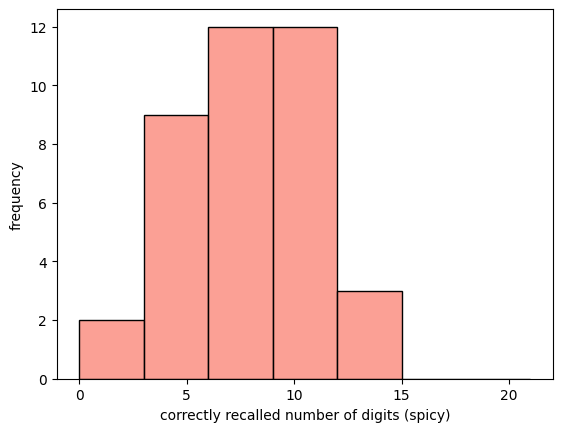

In [5]:
ax = sns.histplot(data=spicy, binrange=(0,20), binwidth=3, color="salmon")
ax.set(xlabel="correctly recalled number of digits (spicy)", ylabel="frequency")

[Text(0.5, 0, 'correctly recalled number of digits (control)'),
 Text(0, 0.5, 'frequency')]

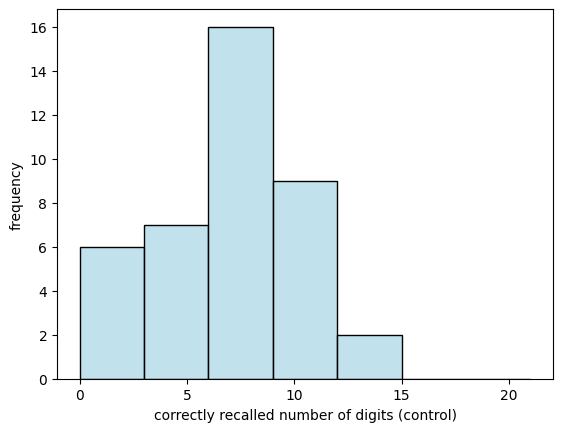

In [6]:
ax = sns.histplot(data=control, binrange=(0,20), binwidth=3, color="lightblue")
ax.set(xlabel="correctly recalled number of digits (control)", ylabel="frequency")

In [7]:
spicy_var = spicy.std(ddof=1)**2 / spicy.shape[0]
control_var = control.std(ddof=1)**2 / control.shape[0]
stdev = (spicy_var + control_var)**(1/2)

df = (spicy_var + control_var)**2 / (spicy_var**2 / (spicy.shape[0] - 1) + control_var**2 / (control.shape[0] - 1))

t, p = stats.ttest_ind_from_stats(spicy.mean(), spicy.std(ddof=1), spicy.shape[0],
                                  control.mean(), control.std(ddof=1), control.shape[0],
                                  equal_var=False, alternative="two-sided")

print("spicy  : mean = %.5f, std = %.5f, n = %d" % (spicy.mean(), spicy.std(ddof=1), spicy.shape[0]))
print("control: mean = %.5f, std = %.5f, n = %d" % (control.mean(), control.std(ddof=1), control.shape[0]))
print("==========================================================")
print("ttest_ind_from_stats")
print("==========================================================")
print("std = %.5f, df = %.5f, t = %.5f --> p = %.5f" % (stdev, df, t, p))

spicy  : mean = 7.52632, std = 3.10829, n = 38
control: mean = 6.70000, std = 3.08179, n = 40
ttest_ind_from_stats
std = 0.70120, df = 75.72255, t = 1.17843 --> p = 0.24232
